
# <p style="text-align:center"> <font color='darkorange'>**CUNEF**</font>
## <p style="text-align:center"> **TFM - Análisis de sentimiento pólitico en Twitter**
### <p style="text-align:center"> **4. Otros Modelos**</strong><br />
    
<p style="text-align:left">Pablo Mazariegos Reviriego - <font color='orange'>pablo.mazariegos@cunef.edu </font>

En este proyecto de Trabajo Fin de Máster, realizaremos un análisis de sentimiento de los tweets hechos por los 5 candidatos políticos a la presidencia de Madrid durante el período de campaña política que abarcó desde el 12 hasta el 27 de mayo de 2023. Utilizaremos una base de datos recopilada manualmente que contiene los tweets de los candidatos. El objetivo principal de este proyecto es desarrollar modelos de aprendizaje automático que puedan clasificar los tweets según su sentimiento (positivo, negativo o neutral).

El proyecto se organizará en diferentes cuadernos, cada uno enfocado en una etapa específica del proceso:

 1. EDA y Selección/Preparación de variables
 2. Word Cloud y Análisis de viralidad
 3. Predicciones con GPT3
 4. <font color='darkgreen'> **Otros Modelos**</font>

Este cuaderno se enfoca 

  **INDICE:**
 
 - [Importación de Librerias](#0) 
 - [Carga de datos](#2)
 - [Vectorización](#3)

  **Modelos:**
 - [SVM](#4)
 - [Naive Bayes](#5) 
 - [XGBClassifier](#6)
 - [RandomForest](#7)
 - [Logistic Regression](#8)
 - [Comparativo](#9)
 - [Naive Bayes Fine Tunning](#10)
 

##  <a name="0"> Importación de Librerias</a>

In [33]:
from getpass import getpass
import openai
import requests
from PIL import Image
from io import BytesIO
import openai
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics 
import pickle
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

##  <a name="2"> Carga de datos</a>

In [2]:
file_path = '../data/processed/df_sentimiento_final.csv'
df = pd.read_csv(file_path)
# Definir el mapeo de partidos a valores numéricos
partidos_numericos = {'MÁS MADRID': 0, 'VOX': 1, 'PODEMOS': 2, 'PSOE': 3, 'PP': 4}

# Crear una nueva columna numérica a partir de la columna de partidos
df['partido_num'] = df['partido'].map(partidos_numericos)
df = df.drop("Unnamed: 0", axis=1)
df.head()

,partido,candidato,nick,followers,fecha,post,post_clean,sentimiento,sentimiento_num,negative,...,shared,shared vs viewed,likes,likes vs viewed,votos,porcentaje,escaños,Num_words_POST,sentimiento_clean,partido_num
0,PP,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-12,"Comenzamos la campaña, una vez más, junto a la...",comenzamos la campaa una vez ms junto a la agr...,Positive,1,0.034475,...,261,0.004446,1260,0.021465,1586985,0.4734,71,42,comenzamos campaa vez ms junto agricultura cam...,4
1,PP,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-12,"Madrid es la región del Espíritu de Ermua, la ...",madrid es la regin del espritu de ermua la que...,Negative,-1,0.904359,...,561,0.005522,2127,0.020935,1586985,0.4734,70,24,madrid regin espritu ermua admite totalitarios...,4
2,PP,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-12,"Majadahonda con ganas de Libertad, familia, un...",majadahonda con ganas de libertad familia unid...,Positive,1,0.014554,...,213,0.003568,1042,0.017454,1586985,0.4734,70,18,majadahonda ganas libertad familia unidad aleg...,4
3,PP,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-13,Presidente: líbranos del mal.,presidente lbranos del mal,Negative,-1,0.680318,...,549,0.001660,2592,0.007836,1586985,0.4734,70,4,presidente lbranos mal,4
4,PP,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-13,En Madrid sólo habrá 2 tarifas de transporte p...,en madrid slo habr 2 tarifas de transporte pbl...,Negative,-1,0.628112,...,759,0.003562,3016,0.014153,1586985,0.4734,70,51,madrid slo habr 2 tarifas transporte pblico ma...,4


##  <a name="3"> Vectorización</a>

In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentimiento_clean'])
y = df['partido_num']  

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42

##  <a name="4"> SVM</a>

In [9]:
# Entrenar un modelo SVM
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
model = make_pipeline(vectorizer, svm_classifier)
svm_predictions = svm_classifier.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.58      0.75      0.65        48
           1       0.90      0.70      0.79        40
           2       0.50      0.77      0.61        39
           3       1.00      0.08      0.14        13
           4       0.00      0.00      0.00        14

    accuracy                           0.62       154
   macro avg       0.60      0.46      0.44       154
weighted avg       0.63      0.62      0.57       154



In [10]:
print(confusion_matrix(y_test,svm_predictions))

[[36  2 10  0  0]
 [ 4 28  8  0  0]
 [ 8  1 30  0  0]
 [ 8  0  4  1  0]
 [ 6  0  8  0  0]]


In [11]:
# Save the model.

pickle.dump(model, open('../models/svc_model_tweets.pkl', 'wb'))

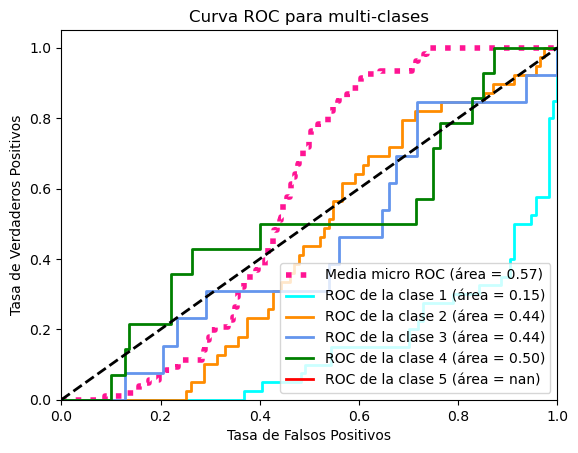

In [12]:
y_score = svm_classifier.decision_function(X_test)

# Binarizar las salidas de clases para poder calcular ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la media micro de las métricas ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar las Curvas ROC
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='Media micro ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para multi-clases')
plt.legend(loc="lower right")
plt.show()


##  <a name="5"> Naive Bayes</a>

In [13]:
# Entrenar un modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
model = make_pipeline(vectorizer, nb_classifier)
nb_predictions = nb_classifier.predict(X_test)
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67        48
           1       0.80      0.82      0.81        40
           2       0.58      0.56      0.57        39
           3       1.00      0.08      0.14        13
           4       0.00      0.00      0.00        14

    accuracy                           0.63       154
   macro avg       0.59      0.46      0.44       154
weighted avg       0.61      0.63      0.58       154



[[41  2  5  0  0]
 [ 5 33  2  0  0]
 [13  4 22  0  0]
 [ 8  0  4  1  0]
 [ 7  2  5  0  0]]


<Axes: >

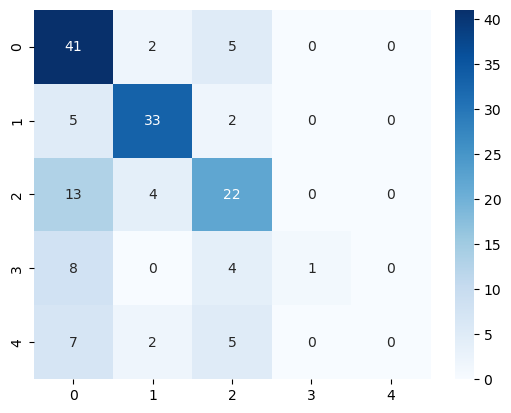

In [14]:
print(confusion_matrix(y_test,nb_predictions))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, nb_predictions)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

In [15]:
# Save the model.

pickle.dump(model, open('../models/nb_model_tweets.pkl', 'wb'))

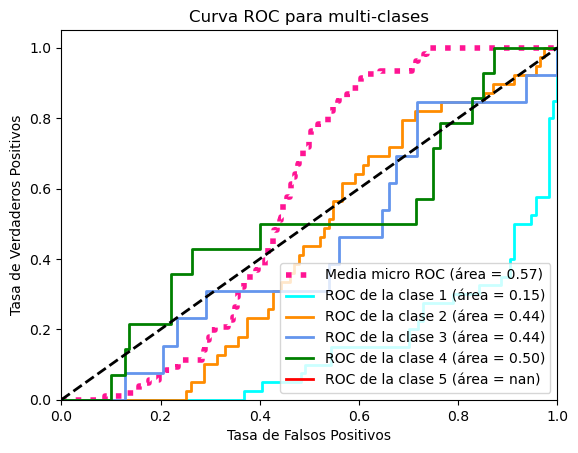

In [16]:
y_score = svm_classifier.decision_function(X_test)

# Binarizar las salidas de clases para poder calcular ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la media micro de las métricas ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar las Curvas ROC
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='Media micro ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para multi-clases')
plt.legend(loc="lower right")
plt.show()

##  <a name="6"> XGBClassifier</a>

In [17]:
# Entrenar un modelo XGBClassifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
model = make_pipeline(vectorizer, xgb_classifier)
xgb_predictions = xgb_classifier.predict(X_test)
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        48
           1       0.64      0.72      0.68        40
           2       0.51      0.59      0.55        39
           3       0.50      0.31      0.38        13
           4       0.33      0.14      0.20        14

    accuracy                           0.58       154
   macro avg       0.52      0.48      0.49       154
weighted avg       0.56      0.58      0.56       154



[[31  3 12  0  2]
 [ 4 29  4  1  2]
 [ 8  7 23  1  0]
 [ 5  2  2  4  0]
 [ 2  4  4  2  2]]


<Axes: >

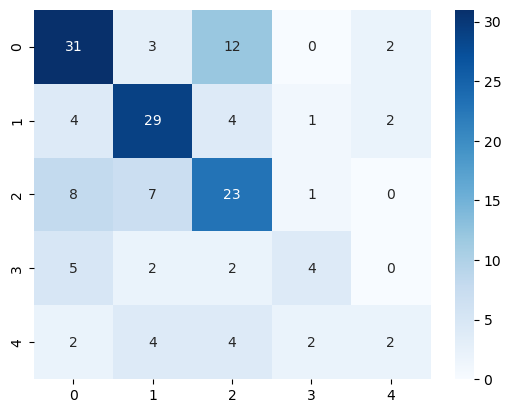

In [18]:
print(confusion_matrix(y_test,xgb_predictions))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, xgb_predictions)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

In [19]:
# Save the model.

pickle.dump(model, open('../models/xgb_model_tweets.pkl', 'wb'))

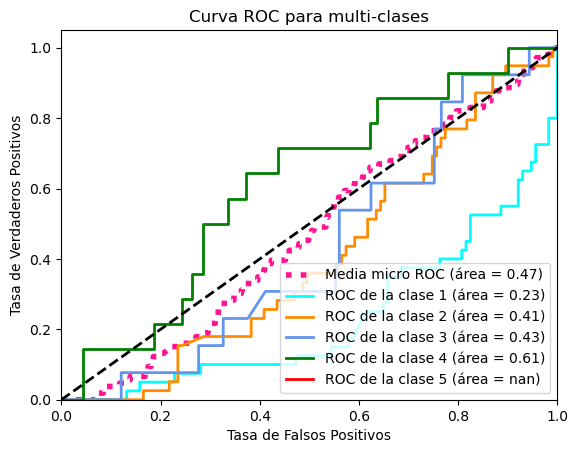

In [20]:
y_score = xgb_classifier.predict_proba(X_test)

# Binarizar las salidas de clases para poder calcular ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la media micro de las métricas ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar las Curvas ROC
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='Media micro ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para multi-clases')
plt.legend(loc="lower right")
plt.show()

##  <a name="7"> RandomForest</a>

In [21]:
# Entrenar un modelo RandomForest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
model = make_pipeline(vectorizer, rf_classifier)
rf_predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        48
           1       0.61      0.90      0.73        40
           2       0.60      0.64      0.62        39
           3       0.75      0.23      0.35        13
           4       1.00      0.07      0.13        14

    accuracy                           0.62       154
   macro avg       0.72      0.50      0.50       154
weighted avg       0.66      0.62      0.59       154



[[31  7  9  1  0]
 [ 2 36  2  0  0]
 [ 6  8 25  0  0]
 [ 5  2  3  3  0]
 [ 4  6  3  0  1]]


<Axes: >

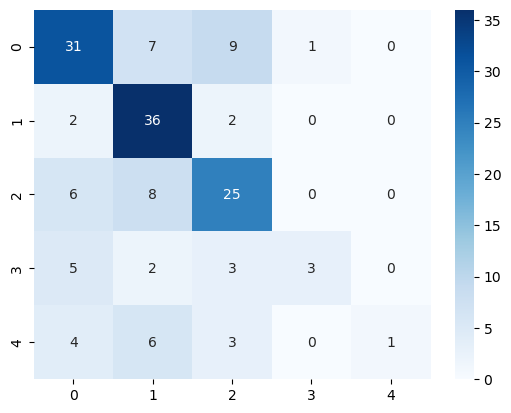

In [22]:
print(confusion_matrix(y_test,rf_predictions))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, rf_predictions)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

In [23]:
# Save the model.

pickle.dump(model, open('../models/rf_model_tweets.pkl', 'wb'))

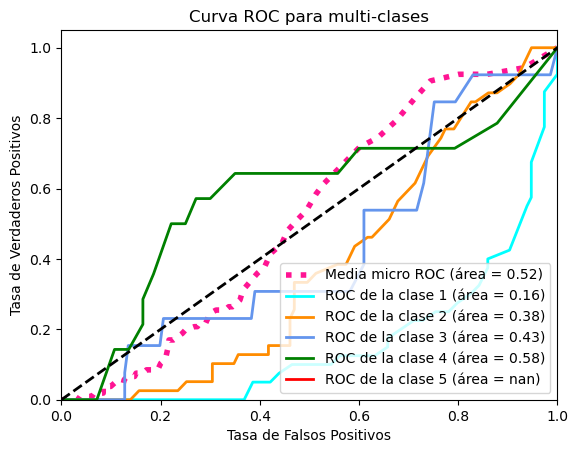

In [24]:
y_score_rf = rf_classifier.predict_proba(X_test)

n_classes = y_test_bin.shape[1]

# Calcular ROC para cada clase
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Calcular la media micro de las métricas ROC
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_rf.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Dibujar las Curvas ROC
plt.figure()
lw = 2
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label='Media micro ROC (área = {0:0.2f})'
               ''.format(roc_auc_rf["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=lw,
             label='ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i+1, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para multi-clases')
plt.legend(loc="lower right")
plt.show()


##  <a name="8"> Logistic Regression</a>

In [26]:
# Entrenar un modelo de Regresión Logística
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
model = make_pipeline(vectorizer, lr_classifier)
lr_predictions = lr_classifier.predict(X_test)
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.59      0.73      0.65        48
           1       0.79      0.78      0.78        40
           2       0.50      0.69      0.58        39
           3       1.00      0.15      0.27        13
           4       0.00      0.00      0.00        14

    accuracy                           0.62       154
   macro avg       0.58      0.47      0.46       154
weighted avg       0.60      0.62      0.58       154



[[35  2 11  0  0]
 [ 3 31  6  0  0]
 [ 8  4 27  0  0]
 [ 7  0  4  2  0]
 [ 6  2  6  0  0]]


<Axes: >

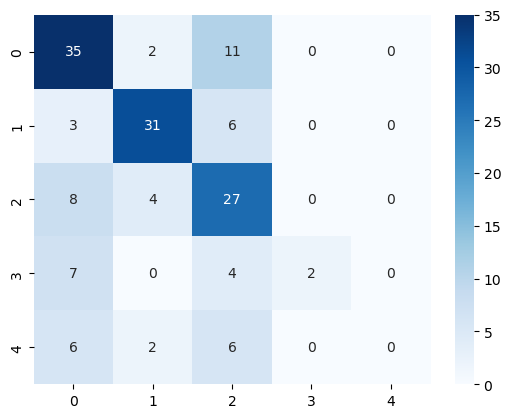

In [27]:
print(confusion_matrix(y_test,lr_predictions))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, lr_predictions)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

In [28]:
# Save the model.

pickle.dump(model, open('../models/lr_model_tweets.pkl', 'wb'))

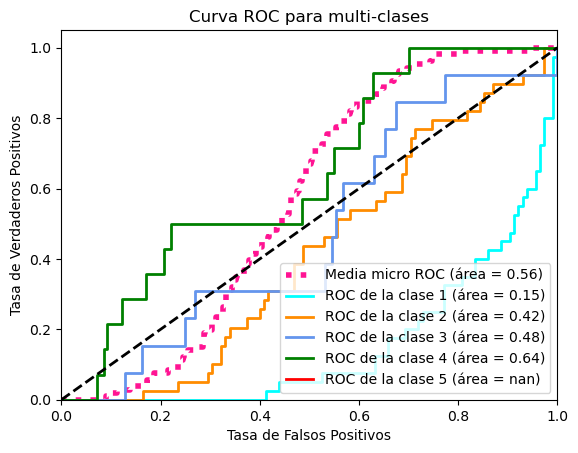

In [29]:
y_score_lr = lr_classifier.predict_proba(X_test)

# Binarizar las salidas de clases para poder calcular ROC
# Nota: No es necesario binarizar de nuevo si ya se hizo anteriormente
# y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Calcular ROC para cada clase
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# Calcular la media micro de las métricas ROC
fpr_lr["micro"], tpr_lr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_lr.ravel())
roc_auc_lr["micro"] = auc(fpr_lr["micro"], tpr_lr["micro"])

# Dibujar las Curvas ROC
plt.figure()
lw = 2
plt.plot(fpr_lr["micro"], tpr_lr["micro"],
         label='Media micro ROC (área = {0:0.2f})'
               ''.format(roc_auc_lr["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=lw,
             label='ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i+1, roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para multi-clases')
plt.legend(loc="lower right")
plt.show()


##  <a name="9"> Comparativo</a>

In [32]:
# Crear un diccionario con las puntuaciones de precisión de cada modelo
accuracy_dict = {
    'SVM': accuracy_score(y_test, svm_predictions),
    'Naive Bayes': accuracy_score(y_test, nb_predictions),
    'XGBClassifier': accuracy_score(y_test, xgb_predictions),
    'RandomForest': accuracy_score(y_test, rf_predictions),
    'Logistic Regression': accuracy_score(y_test, lr_predictions),
}

# Convertir el diccionario en un DataFrame de pandas para visualizarlo
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

print(accuracy_df)

                 Model  Accuracy
0                  SVM  0.616883
1          Naive Bayes  0.629870
2        XGBClassifier  0.577922
3         RandomForest  0.623377
4  Logistic Regression  0.616883


##  <a name="10"> Naive Bayes Fine Tunning</a>

In [38]:

# Define los parámetros que quieres ajustar
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
}

# Crea una nueva instancia del modelo
nb_classifier = MultinomialNB()

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(nb_classifier, param_grid=params, cv=5)

# Ajusta los datos
grid_search.fit(X_train, y_train)
model = make_pipeline(vectorizer, grid_search)
# Imprime los mejores parámetros
print("Best Parameters: ", grid_search.best_params_)

# Predice con los mejores parámetros
nb_predictions = grid_search.predict(X_test)

# Imprime el informe de clasificación
print(classification_report(y_test, nb_predictions))

Best Parameters:  {'alpha': 0.1}
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        48
           1       0.73      0.82      0.78        40
           2       0.62      0.67      0.64        39
           3       0.54      0.54      0.54        13
           4       0.33      0.07      0.12        14

    accuracy                           0.68       154
   macro avg       0.59      0.57      0.56       154
weighted avg       0.65      0.68      0.65       154



In [37]:
accuracy_nb = accuracy_score(y_test, nb_predictions)
print("Accuracy Naive Bayes:", accuracy_nb)

Accuracy Naive Bayes: 0.6753246753246753


In [39]:
# Save the model.

pickle.dump(model, open('../models/lr_model_tweets_final.pkl', 'wb'))

[[35  2 11  0  0]
 [ 3 31  6  0  0]
 [ 8  4 27  0  0]
 [ 7  0  4  2  0]
 [ 6  2  6  0  0]]


<Axes: >

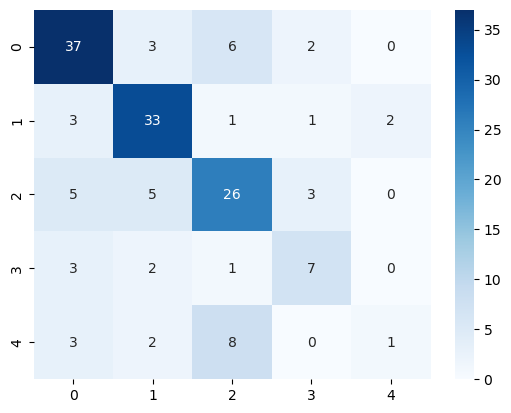

In [40]:
print(confusion_matrix(y_test,lr_predictions))

# Confusion matrix.

conf_mat = confusion_matrix(y_test, nb_predictions)

# Plot the heatmap.

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

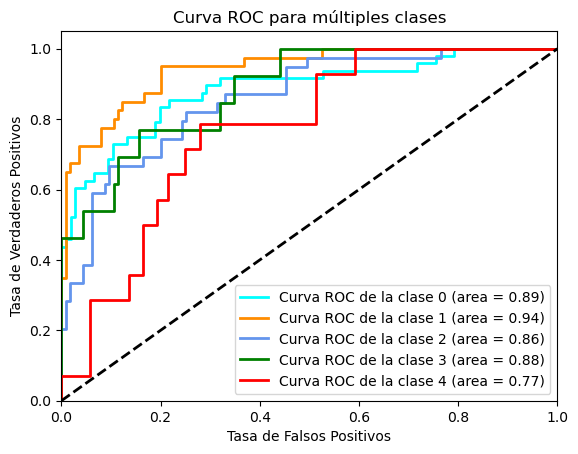

In [44]:
# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Calcula la probabilidad de cada clase
y_score = grid_search.predict_proba(X_test)

# Calcular la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfico de todas las curvas ROC
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Curva ROC de la clase {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para múltiples clases')
plt.legend(loc="lower right")
plt.show()